In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('/content/covid19_casos_brasil.csv')
df

In [ ]:
cidades = ['Joinville', 'Curitiba', 'Florianópolis', 'Porto Alegre', 'São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Vitória']
df_selecionado = df.loc[df['city'].isin(cidades)]

In [ ]:
df_selecionado

In [ ]:
# Extrair os anos da coluna 'date'
anos = df['date'].str.extract(r'(\d{4})')

# Contar os valores únicos dos anos
contagem_anos = anos[0].nunique()

# Verificar se todos os anos são iguais a 2020
todos_anos_2020 = all(anos[0] == '2020')

print("Número de anos únicos:", contagem_anos)
print("Todos os anos são 2020?", todos_anos_2020)


Número de anos únicos: 1
Todos os anos são 2020? True


In [ ]:
df_selecionado['date']

0         2020-02-25
2         2020-02-26
4         2020-02-27
6         2020-02-28
8         2020-02-29
             ...    
161794    2020-06-04
161979    2020-06-04
162019    2020-06-04
162715    2020-06-04
163754    2020-06-05
Name: date, Length: 692, dtype: object

In [ ]:
df_selecionado['date'] = pd.to_datetime(df_selecionado['date'])

<ipython-input-74-3bc17397ad09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['date'] = pd.to_datetime(df_selecionado['date'])


In [ ]:
# Criando um dicionário para armazenar os DataFrames separados por cidade
dfs_por_cidade = {}
rotulo_cidade = {}

# Iterando sobre os grupos criados com base na coluna 'city'
for cidade, dados_cidade in df_selecionado.groupby('city'):
    # Obtendo a primeira letra da cidade e criando o nome do DataFrame
    nome_df = f"df_{cidade.lower()[0]}"
    # Armazenando cada DataFrame separado no dicionário
    dfs_por_cidade[nome_df] = dados_cidade
    rotulo_cidade[nome_df] = cidade

## transformando a coluna 'Date' no formato datetime

In [ ]:
months = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dec': 12}
dfs = {}

for city in dfs_por_cidade:
  dfs[city] = {}
  for month in months:
    dfs[city][month] = dfs_por_cidade[city][dfs_por_cidade[city]['date'].dt.month == months[month]]

In [ ]:
death_per_cities = {}

for city in dfs:
  death_per_cities[city] = {}
  for month in months:
    death_per_cities[city][month] = sum(dfs[city][month]['new_deaths'])

In [ ]:

for city in death_per_cities:

  death_per_month = death_per_cities[city]

  meses = list(death_per_month.keys())
  valores = list(death_per_month.values())

  plt.figure(figsize=(10, 6))
  plt.bar(meses, valores, color='skyblue')
  plt.title(f'Dados de mortes por mês em {rotulo_cidade[city]}')
  plt.xlabel('Mês')
  plt.ylabel('Mortes')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

In [ ]:
cases_per_cities = {}

for city in dfs:
  cases_per_cities[city] = {}
  for month in months:
    cases_per_cities[city][month] = sum(dfs[city][month]['new_confirmed'])

In [ ]:
maxValue = 0
for city in cases_per_cities:
    values = list(cases_per_cities[city].values())
    if max(values) > maxValue: maxValue = max(values)

In [ ]:
for city in cases_per_cities:

  cases_per_month = cases_per_cities[city]

  meses = list(cases_per_month.keys())
  valores = list(cases_per_month.values())

  plt.figure(figsize=(10, 6))
  plt.bar(meses, valores, color='skyblue')
  plt.title(f'Dados de casos confirmados de covid por mês em {rotulo_cidade[city]}')
  plt.xlabel('Mês')
  plt.ylabel('Casos')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  # plt.ylim(0,maxValue * 1.1)
  plt.show()

In [ ]:
tot_death_cities = {}
tot_cases_cities = {}

for city in death_per_cities:
  tot_death_cities[city] = sum(death_per_cities[city].values())
  tot_cases_cities[city] = sum(cases_per_cities[city].values())

print(tot_death_cities)
print(tot_cases_cities)


# Questão 2

### Correlacionar os casos e mortes com sua população para todas as capitais brasileiras. Quais são as cinco cidades com maiores problemas? Quais são as cinco cidades com pouco/sem problema?

In [ ]:
capitais = ['Rio Branco','Maceió','Macapá','Manaus','Salvador','Fortaleza','Vitória','Goiânia','São Luís','Cuiabá',
            'Campo Grande','Belo Horizonte','Belém','João Pessoa','Curitiba','Recife','Teresina','Rio de Janeiro',
            'Natal','Porto Alegre','Porto Velho','Boa Vista','Florianópolis','São Paulo','Aracaju','Palmas','Brasília']
df_selecionado_cap = df.loc[df['city'].isin(capitais)]

populacao_por_cidade = df[df['city'].isin(capitais)].groupby('city')['estimated_population_2019'].first()

print(populacao_por_cidade)

In [ ]:
# Criando um dicionário para armazenar os DataFrames separados por cidade
dfs_por_cidade = {}
rotulo_cidade = {}

# Iterando sobre os grupos criados com base na coluna 'city'
for cidade, dados_cidade in df_selecionado_cap.groupby('city'):
    # Obtendo a primeira letra da cidade e criando o nome do DataFrame
    nome_df = f"{cidade}"
    # Armazenando cada DataFrame separado no dicionário
    dfs_por_cidade[nome_df] = dados_cidade
    rotulo_cidade[nome_df] = cidade

In [ ]:
death_tot_cap = {}

for city in dfs_por_cidade:
  death_tot_cap[city] = sum(dfs_por_cidade[city]['new_deaths'])

death_tot_cap

In [ ]:
confirmed_tot_cap = {}

for city in dfs_por_cidade:
  confirmed_tot_cap[city] = sum(dfs_por_cidade[city]['new_confirmed'])

confirmed_tot_cap

In [ ]:
mortes_por_100k_habitantes = [val/(populacao_por_cidade[idx]/100000) for idx, val in enumerate(list(death_tot_cap.values()))]
df_cap_mortes = pd.DataFrame({'Cidade': capitais, 'Mortes/População': mortes_por_100k_habitantes})

# Encontrar as 5 cidades com as maiores relações de mortes/população
top_cidades_mais_mortes = df_cap_mortes.nlargest(5, 'Mortes/População')
top_cidades_menos_mortes = df_cap_mortes.nsmallest(5, 'Mortes/População')

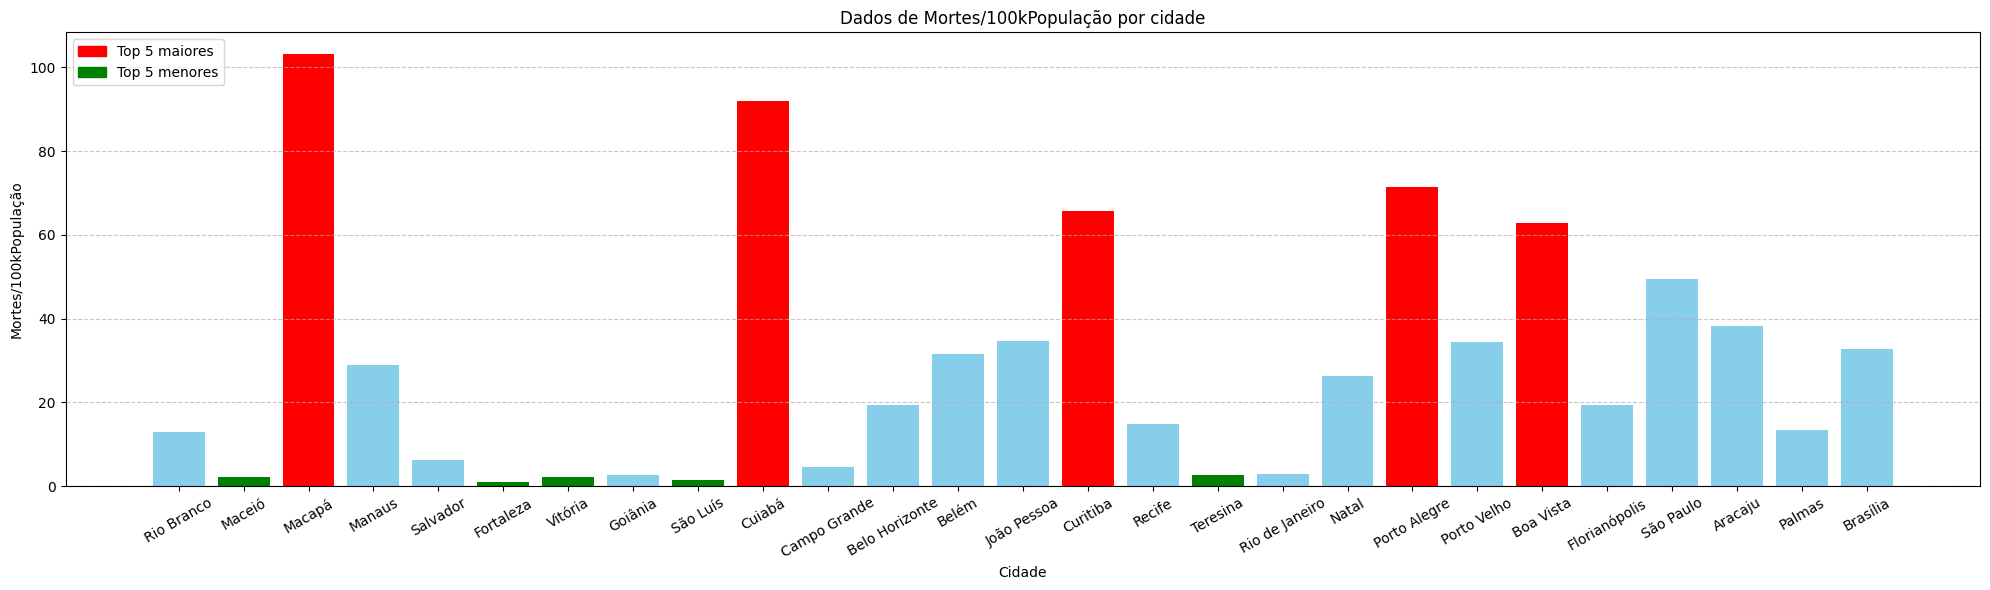

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(capitais, mortes_por_100k_habitantes, color='skyblue')
plt.bar(top_cidades_mais_mortes['Cidade'], top_cidades_mais_mortes['Mortes/População'], color='red')
plt.bar(top_cidades_menos_mortes['Cidade'], top_cidades_menos_mortes['Mortes/População'], color='green')


plt.title(f'Dados de Mortes/100kPopulação por cidade')
plt.xlabel('Cidade')
plt.ylabel('Mortes/100kPopulação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
legend_colors = {'Top 5 maiores': 'red', 'Top 5 menores': 'green'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors.values()]
plt.legend(legend_handles, legend_colors.keys(), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
casos_por_100k_habitantes = [val/(populacao_por_cidade[idx]/100000) for idx, val in enumerate(list(confirmed_tot_cap.values()))]
df_cap_casos = pd.DataFrame({'Cidade': capitais, 'Casos/100kPopulação': casos_por_100k_habitantes})

# Encontrar as 5 cidades com as maiores relações de Casos/100kPopulação
top_cidades_mais_casos = df_cap_casos.nlargest(5, 'Casos/100kPopulação')
top_cidades_menos_casos = df_cap_casos.nsmallest(5, 'Casos/100kPopulação')

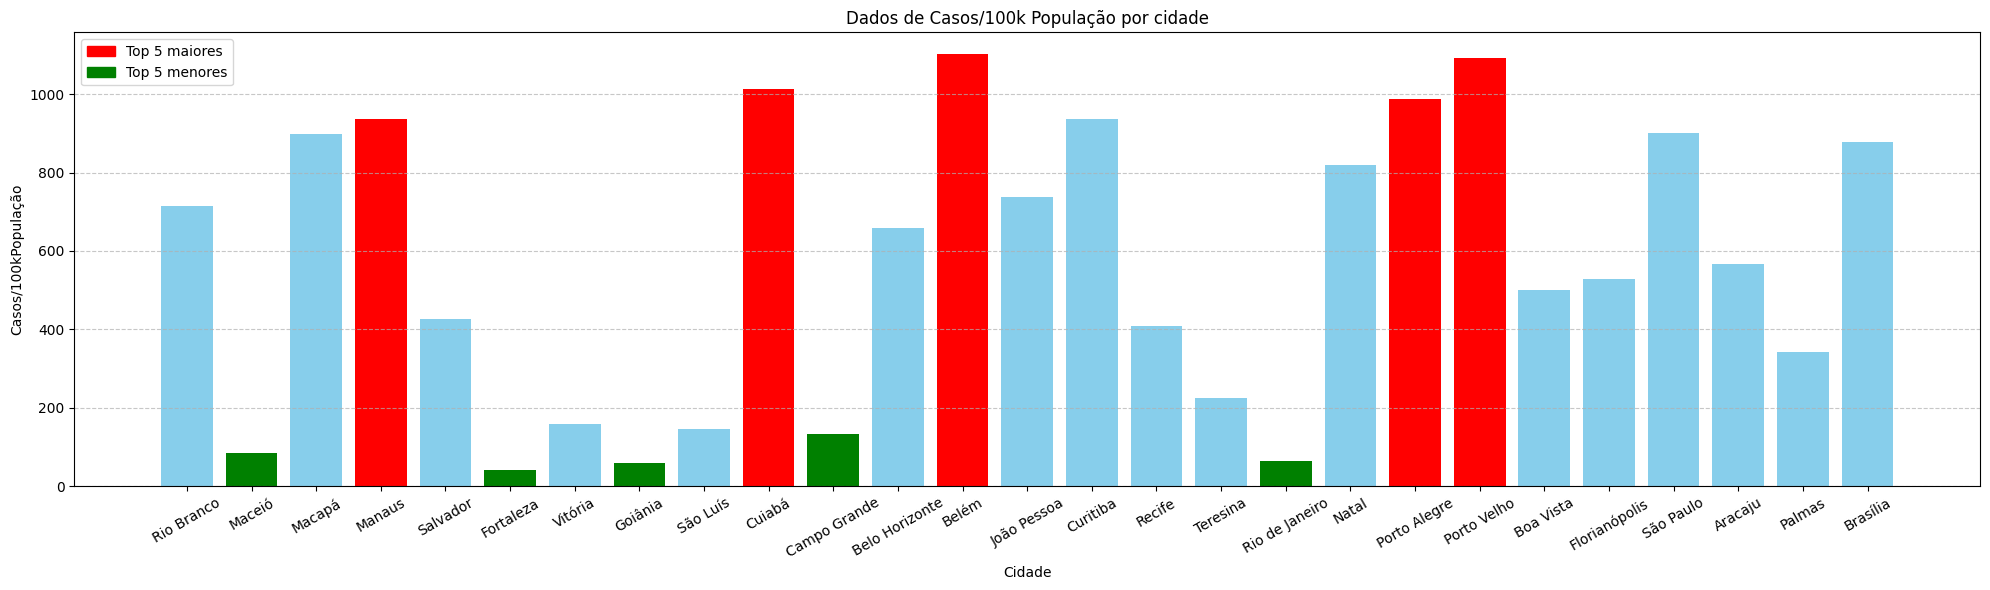

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(capitais, casos_por_100k_habitantes, color='skyblue')
plt.bar(top_cidades_mais_casos['Cidade'], top_cidades_mais_casos['Casos/100kPopulação'], color='red')
plt.bar(top_cidades_menos_casos['Cidade'], top_cidades_menos_casos['Casos/100kPopulação'], color='green')


plt.title(f'Dados de Casos/100k População por cidade')
plt.xlabel('Cidade')
plt.ylabel('Casos/100kPopulação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
legend_colors = {'Top 5 maiores': 'red', 'Top 5 menores': 'green'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors.values()]
plt.legend(legend_handles, legend_colors.keys(), loc='upper left')
plt.tight_layout()
plt.show()

# 3) Correlacionar os casos e mortes com sua população para as cidades conforme o seu grupo (tabela abaixo). Quais são as três cidades com maiores problemas? Listar o nome das suas cidades e a população!

In [ ]:
df_MG = df[df['state'] == 'MG']
df_MG = df_MG[df_MG['place_type'] == 'city']
df_MG = df_MG.dropna()

In [ ]:
# Selecionar apenas as linhas onde o estado é 'MG'
dados_MG =  df_MG.drop(df_MG[df_MG['city'] == 'Belo Horizonte'].index)[df_MG['state'] == 'MG']

# Ordenar as linhas pelo valor da população em ordem decrescente
dados_MG_ordenados = dados_MG.sort_values(by='estimated_population_2019', ascending=False)

# Pegar os cinco primeiros valores da coluna da cidade
cinco_maiores_cidades_MG = dados_MG_ordenados['city'].unique()[:5]

print(cinco_maiores_cidades_MG)

['Uberlândia' 'Contagem' 'Juiz de Fora' 'Betim' 'Montes Claros']


<ipython-input-130-153e39bc9f83>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_MG =  df_MG.drop(df_MG[df_MG['city'] == 'Belo Horizonte'].index)[df_MG['state'] == 'MG']


In [ ]:
city_norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
df_Norte =  df.loc[df['state'].isin(city_norte)].dropna()
# Selecionar apenas as linhas onde o estado é 'MG'
dados_Norte =  df_Norte.drop(df_Norte[df_Norte['city'] == 'Palmas'].index)
dados_Norte =  dados_Norte.drop(dados_Norte[dados_Norte['city'] == 'Rio Branco'].index)
dados_Norte =  dados_Norte.drop(dados_Norte[dados_Norte['city'] == 'Macapá'].index)
dados_Norte =  dados_Norte.drop(dados_Norte[dados_Norte['city'] == 'Manaus'].index)
dados_Norte =  dados_Norte.drop(dados_Norte[dados_Norte['city'] == 'Belém'].index)
dados_Norte =  dados_Norte.drop(dados_Norte[dados_Norte['city'] == 'Porto Velho'].index)
dados_Norte =  dados_Norte.drop(dados_Norte[dados_Norte['city'] == 'Boa Vista'].index)

# Ordenar as linhas pelo valor da população em ordem decrescente
dados_Norte_ordenados = dados_Norte.sort_values(by='estimated_population_2019', ascending=False)

# Pegar os cinco primeiros valores da coluna da cidade
cinco_maiores_cidades_Norte = dados_Norte_ordenados['city'].unique()[:5]

print(cinco_maiores_cidades_Norte)

['Ananindeua' 'Santarém' 'Marabá' 'Parauapebas' 'Castanhal']


In [224]:
df_chap = df[df['city'] == 'Chapecó']
pop_chap = df_chap.groupby('city')['estimated_population_2019'].first()
pop_chap

city
Chapecó    220367.0
Name: estimated_population_2019, dtype: float64

In [245]:
df_SJP = df[df['city'] == 'São José dos Pinhais']
pop_SJP = df_SJP.groupby('city')['estimated_population_2019'].first()
pop_SJP

city
São José dos Pinhais    323340.0
Name: estimated_population_2019, dtype: float64

In [ ]:
df_selecionado_MG = dados_MG.loc[dados_MG['city'].isin(cinco_maiores_cidades_MG)]

populacao_por_cidade_MG = dados_MG[dados_MG['city'].isin(cinco_maiores_cidades_MG)].groupby('city')['estimated_population_2019'].first()

print(populacao_por_cidade_MG)

city
Betim            439340.0
Contagem         663855.0
Juiz de Fora     568873.0
Montes Claros    409341.0
Uberlândia       691305.0
Name: estimated_population_2019, dtype: float64


In [ ]:
df_selecionado_Norte = dados_Norte.loc[dados_Norte['city'].isin(cinco_maiores_cidades_Norte)]

populacao_por_cidade_Norte = dados_Norte[dados_Norte['city'].isin(cinco_maiores_cidades_Norte)].groupby('city')['estimated_population_2019'].first()

print(populacao_por_cidade_Norte)

city
Ananindeua     530598.0
Castanhal      200793.0
Marabá         279349.0
Parauapebas    208273.0
Santarém       304589.0
Name: estimated_population_2019, dtype: float64


In [246]:
# Criando um dicionário para armazenar os DataFrames separados por cidade
dfs_por_cidade = {}
rotulo_cidade = {}

city_N_MG =  cinco_maiores_cidades_Norte.tolist() + cinco_maiores_cidades_MG.tolist() + ['Chapecó','São José dos Pinhais']
df_all = pd.concat([df_selecionado_MG, dados_Norte,df_chap,df_SJP], axis=0).loc[df['city'].isin(city_N_MG)]
# Iterando sobre os grupos criados com base na coluna 'city'
for cidade, dados_cidade in df_all.groupby('city'):
    # Obtendo a primeira letra da cidade e criando o nome do DataFrame
    nome_df = f"{cidade}"
    # Armazenando cada DataFrame separado no dicionário
    dfs_por_cidade[nome_df] = dados_cidade
    rotulo_cidade[nome_df] = cidade

In [248]:
pop_N_MG = pd.concat([populacao_por_cidade_MG, populacao_por_cidade_Norte,pop_chap,pop_SJP], axis=0).sort_index()
print(pop_N_MG)

city
Ananindeua              530598.0
Betim                   439340.0
Castanhal               200793.0
Chapecó                 220367.0
Contagem                663855.0
Juiz de Fora            568873.0
Marabá                  279349.0
Montes Claros           409341.0
Parauapebas             208273.0
Santarém                304589.0
São José dos Pinhais    323340.0
Uberlândia              691305.0
Name: estimated_population_2019, dtype: float64


In [249]:
death_tot_cap = {}

for city in dfs_por_cidade:
  death_tot_cap[city] = sum(dfs_por_cidade[city]['new_deaths'])

death_tot_cap

{'Ananindeua': 281.0,
 'Betim': 11.0,
 'Castanhal': 98.0,
 'Chapecó': 4.0,
 'Contagem': 13.0,
 'Juiz de Fora': 30.0,
 'Marabá': 101.0,
 'Montes Claros': 2.0,
 'Parauapebas': 73.0,
 'Santarém': 96.0,
 'São José dos Pinhais': 5.0,
 'Uberlândia': 24.0}

In [250]:
confirmed_tot_cap = {}

for city in dfs_por_cidade:
  confirmed_tot_cap[city] = sum(dfs_por_cidade[city]['new_confirmed'])

confirmed_tot_cap

{'Ananindeua': 2987.0,
 'Betim': 171.0,
 'Castanhal': 917.0,
 'Chapecó': 1002.0,
 'Contagem': 327.0,
 'Juiz de Fora': 671.0,
 'Marabá': 741.0,
 'Montes Claros': 73.0,
 'Parauapebas': 2773.0,
 'Santarém': 1308.0,
 'São José dos Pinhais': 127.0,
 'Uberlândia': 1116.0}

In [251]:
mortes_por_100k_habitantes = [val/(pop_N_MG[idx]/100000) for idx, val in enumerate(list(death_tot_cap.values()))]
df_cap_mortes = pd.DataFrame({'Cidade': city_N_MG, 'Mortes/População': mortes_por_100k_habitantes})

# Encontrar as 5 cidades com as maiores relações de mortes/população
top_cidades_mais_mortes = df_cap_mortes.nlargest(3, 'Mortes/População')
top_cidades_menos_mortes = df_cap_mortes.nsmallest(3, 'Mortes/População')
print(top_cidades_mais_mortes)

       Cidade  Mortes/População
0  Ananindeua         52.959114
2      Marabá         48.806482
6    Contagem         36.155490


In [252]:
casos_por_100k_habitantes = [val/(pop_N_MG[idx]/100000) for idx, val in enumerate(list(confirmed_tot_cap.values()))]
df_cap_casos = pd.DataFrame({'Cidade': city_N_MG, 'Casos/100kPopulação': casos_por_100k_habitantes})

# Encontrar as 5 cidades com as maiores relações de Casos/100kPopulação
top_cidades_mais_casos = df_cap_casos.nlargest(3, 'Casos/100kPopulação')
top_cidades_menos_casos = df_cap_casos.nsmallest(3, 'Casos/100kPopulação')

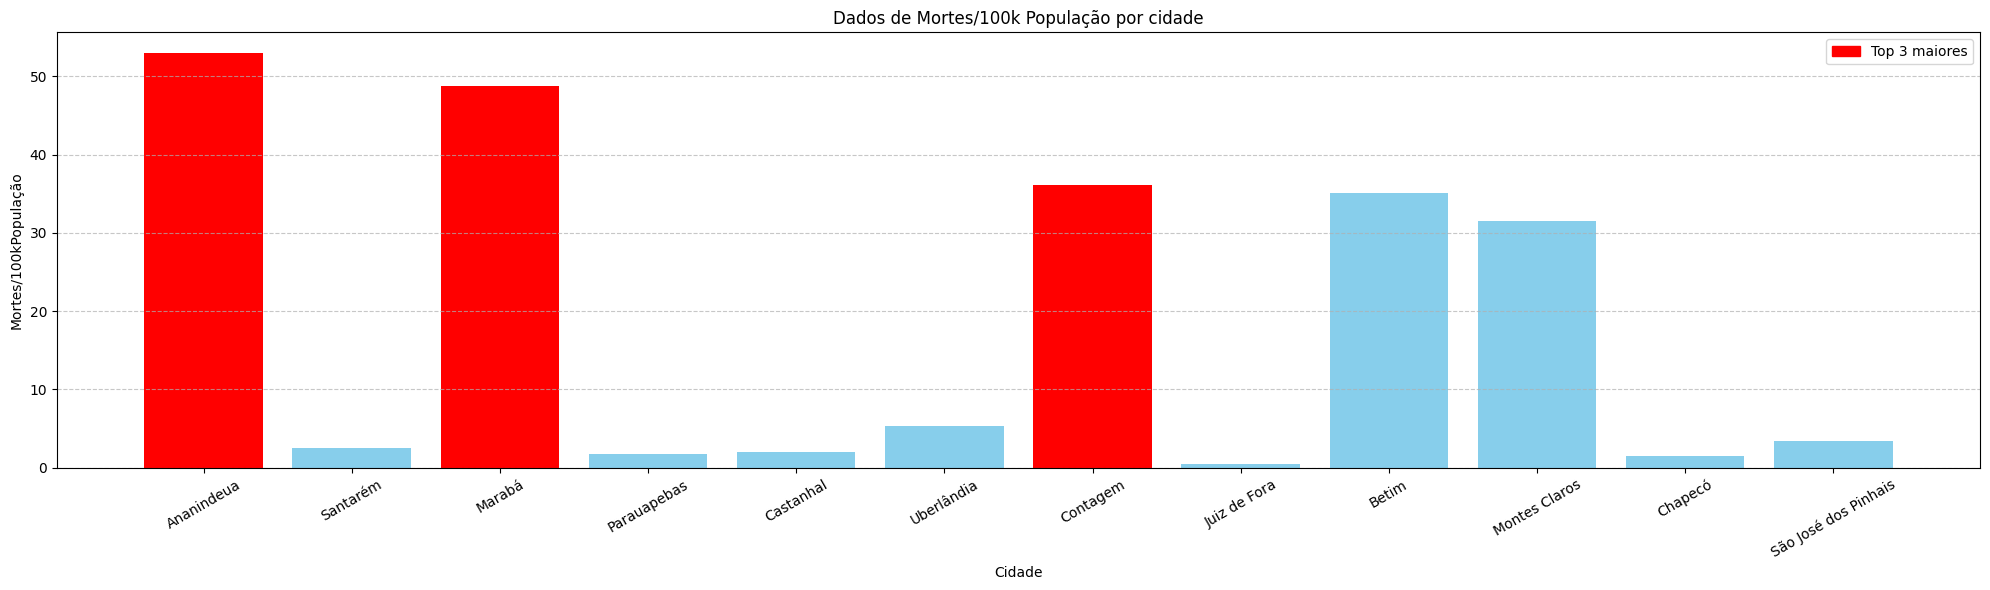

In [253]:
maiores_indices = np.argsort(mortes_por_100k_habitantes)[-3:]

cores = ['red' if i in maiores_indices else 'skyblue' for i in range(len(city_N_MG))]

plt.figure(figsize=(20, 6))
plt.bar(city_N_MG, mortes_por_100k_habitantes, color=cores)

plt.title(f'Dados de Mortes/100k População por cidade')
plt.xlabel('Cidade')
plt.ylabel('Mortes/100kPopulação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)

legend_colors = {'Top 3 maiores': 'red'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors.values()]
plt.legend(legend_handles, legend_colors.keys(), loc='upper right')

plt.tight_layout()
plt.show()


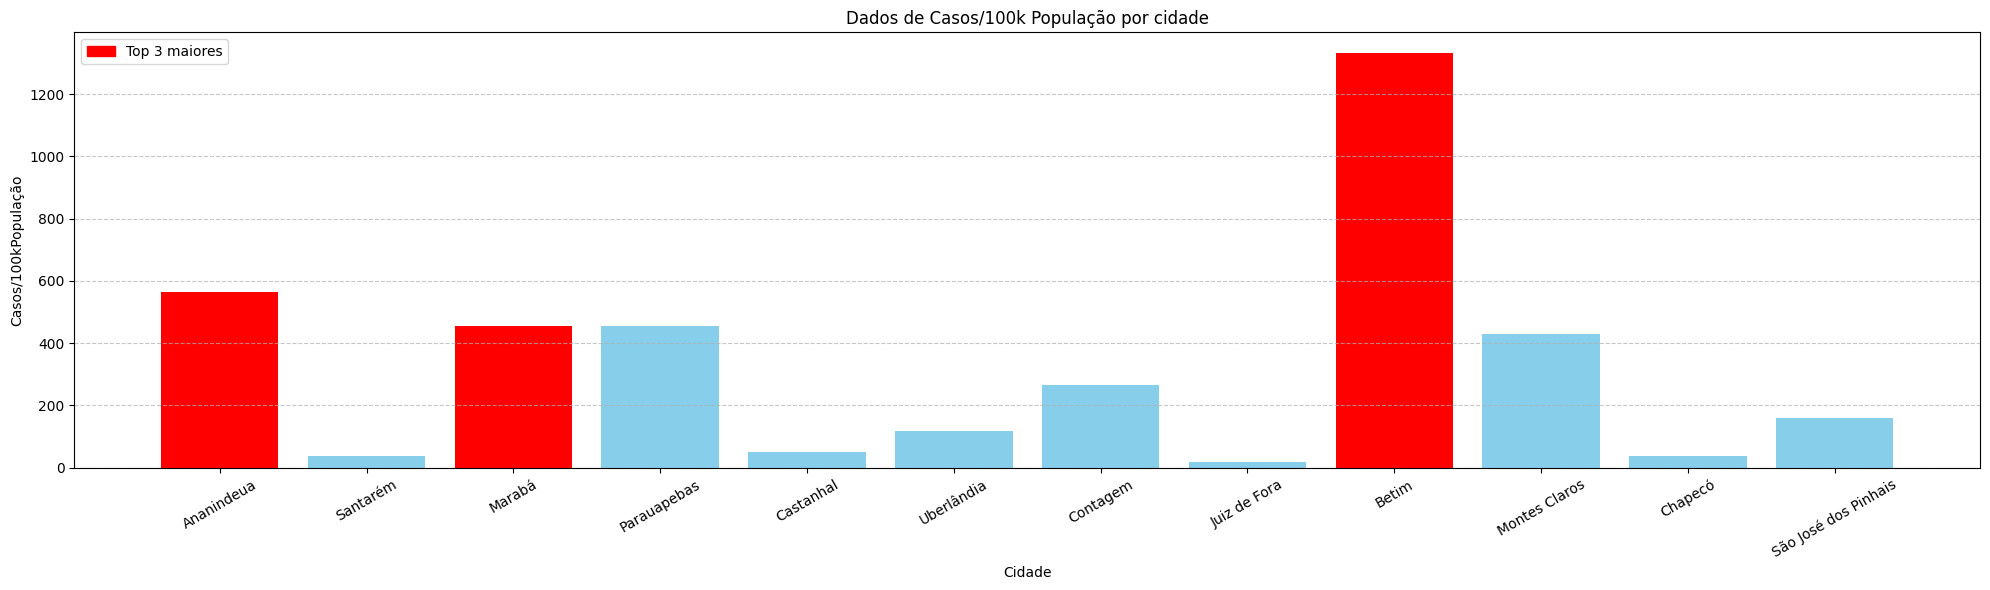

In [254]:
maiores_indices = np.argsort(casos_por_100k_habitantes)[-3:]

cores = ['red' if i in maiores_indices else 'skyblue' for i in range(len(city_N_MG))]

plt.figure(figsize=(20, 6))
plt.bar(city_N_MG, casos_por_100k_habitantes, color=cores)

plt.title(f'Dados de Casos/100k População por cidade')
plt.xlabel('Cidade')
plt.ylabel('Casos/100kPopulação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)

legend_colors = {'Top 3 maiores': 'red'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors.values()]
plt.legend(legend_handles, legend_colors.keys(), loc='upper left')

plt.tight_layout()
plt.show()
